# House Market Research

---

## Introduction

1. **Background**

Our clients want to buy a house at Bekasi, East Java. Before buying houses, they need to know what facilities are they will obtain with their budgets. They also have a few assumptions and considerations to find the best houses for their families.

2. **Goals**

This project is dedicated for analysing house price sold at www.rumah123.com concentrated at Bekasi, West Java. Gathering 200 houses' data as the sample for helping to describe house market condition

3. **Exploration & Analysis**

    - What is the range of fair price for houses in Bekasi?
    - Is the availability of carport make big differences on house price?
    - Between land area and building area, what is the most affecting factor of houses' price?
    - What districts are top 5 districts of cheapest houses in Bekasi?
    - What is the average price of house having 2 bedrooms?
    - What is the average price of house with land area less than 70 m²?

## Import Libraries

In [1]:
import pandas as pd                 # For Processing Data
from selenium import webdriver      # For Accessing Website Automatically 
from bs4 import BeautifulSoup       # For Transforming HTML to Text
from scipy import stats             # For Statistical Operations
import numpy as np                  # For Numerical Operations
import matplotlib.pyplot as plt     # For Visualization

## Data Extraction

This research collected data from www.tokopedia.com (one of the largest marketplace in Indonesia) by scraping directly at the website.

Collected Data:
- Location (district)
- Land Area (m²)
- Building Area (m²)
- Number of Carports
- Number of Bedrooms
- Number of Bathrooms
- Price (rupiah)

### Web Scraping

```python
# Make empty lists for collected data
all_locations=[]
all_land_areas=[]
all_building_areas=[]
all_carports=[]
all_bedrooms=[]
all_bathrooms=[]
all_prices=[]

# Driver for accessing website
driver=webdriver.Firefox()

# Code for Webpage Looping
num_pages=10
for page in range (1, num_pages+1):
    if page == 1:
        page_url = "https://www.rumah123.com/jual/bekasi/rumah/"
    else:
        page_url = f"https://www.rumah123.com/jual/bekasi/rumah/?page={page}"
    driver.get(page_url)

    # Set HTML reader
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')

    # Looping Code for Data Collection
    elements = soup.find_all('div', {'class':'p-4 flex flex-col gap-y-2'})
    for elem in elements:

        # Collecting Location
        location=elem.find("p", {"class":"text-left font-medium text-greyText text-sm"})
        if location != None:
            all_locations.append(location.get_text())
        else: 
            all_locations.append(None)

        # Finding the tag contained other data
        box = elem.find('div', {"class": "no-scrollbar flex overflow-x-auto snap-mandatory snap-x scroll-pl-4 gap-4 [&>*]:-scroll-ml-4 [&>*]:snap-start [&>*]:shrink-0 z-1 flex items-center gap-x-2 text-accent font-medium text-sm"})
        box = box.find_all("span")
        
        # Conditional for the house with complete data
        if len(box)>= 7:
            # Conditional for collecting number of bedrooms, number of bathrooms, number of carports, land areas and bulding areas
            if box != None:
                all_bedrooms.append(box[0].get_text())
            else:
                all_bedrooms.append(None)

            if box != None:
                all_bathrooms.append(box[1].get_text())
            else:
                all_bathrooms.append(None)

            if box != None:
                all_carports.append(box[2].get_text())
            else:
                all_carports.append(None)

            if box != None:
                all_land_areas.append(box[3].get_text())
            else:
                all_land_areas.append(None)

            if box != None:
                all_building_areas.append(box[5].get_text())
            else:
                all_building_areas.append(None)
        # Conditional for the house with incomplete data (without carport)
        else:
            # Conditional for collecting number of bedrooms, number of bathrooms, number of carports, land areas and bulding areas
            if box != None:
                all_bedrooms.append(box[0].get_text())
            else:
                all_bedrooms.append(None)

            if box != None:
                all_bathrooms.append(box[1].get_text())
            else:
                all_bathrooms.append(None)

            all_carports.append(None)

            if box != None:
                all_land_areas.append(box[2].get_text())
            else:
                all_land_areas.append(None)

            if box != None:
                all_building_areas.append(box[4].get_text())
            else:
                all_building_areas.append(None)

        # Collecting Price
        price = elem.find('span', {"data-testid": "ldp-text-price"})
        if price != None:
            all_prices.append(price.get_text())
        else: 
            all_prices.append(None)
                
# Deactivate Driver
driver.close()

# Data Frame Initiation and Saving
df=pd.DataFrame({"Price":all_prices,
                 "Location":all_locations,
                 "Bedroom":all_bedrooms,
                 "Bathroom":all_bathrooms,
                 "Carport":all_carports,
                 "Land Area":all_land_areas,
                 "Building Area":all_building_areas})
df.to_csv("Scraped Data.csv", index=False)
df
```

## Data Preparation

In [2]:
# Data Loading
df=pd.read_csv("Scraped Data.csv")
display(df)

# Display Name of Columns
df.columns.to_list()

,Price,Location,Bedroom,Bathroom,Carport,Land Area,Building Area
0,"Rp 2,8 Miliar","Jati Asih, Bekasi",3,3,1.0,LT: 120 m²,LB: 140 m²
1,"Rp 3,7 Miliar","Grand Wisata, Bekasi",6,5,1.0,LT: 175 m²,LB: 160 m²
2,"Rp 1,37 Miliar","Summarecon Bekasi, Bekasi",3,2,1.0,LT: 66 m²,LB: 60 m²
3,"Rp 4,5 Miliar","Harapan Indah, Bekasi",6,4,2.0,LT: 300 m²,LB: 275 m²
4,Rp 465 Juta,"Tarumajaya, Bekasi",2,1,NaN,LT: 60 m²,LB: 50 m²
...,...,...,...,...,...,...,...
195,"Rp 2,1 Miliar","Harapan Indah, Bekasi",3,2,1.0,LT: 144 m²,LB: 124 m²
196,Rp 660 Juta,"Bekasi Utara, Bekasi",2,1,NaN,LT: 60 m²,LB: 48 m²
197,Rp 670 Juta,"Bekasi Timur, Bekasi",2,1,NaN,LT: 60 m²,LB: 50 m²
198,Rp 750 Juta,"Bekasi Utara, Bekasi",2,1,NaN,LT: 66 m²,LB: 55 m²


['Price',
 'Location',
 'Bedroom',
 'Bathroom',
 'Carport',
 'Land Area',
 'Building Area']

In [3]:
# Check Data Summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Price          200 non-null    object 
 1   Location       200 non-null    object 
 2   Bedroom        200 non-null    int64  
 3   Bathroom       200 non-null    int64  
 4   Carport        105 non-null    float64
 5   Land Area      200 non-null    object 
 6   Building Area  200 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 11.1+ KB


From the information above, we can see the data has:
- Missing values at Carport column
- Incorrect data type of columns
- Unclean data with other characters/strings

## Data Cleaning

In [4]:
# Handling Missing Value 
df=df.fillna({"Carport":0})

In [5]:
# Cleaning from other characters and correcting data type
df["Price"]=df["Price"].str.replace("Rp ","").str.replace(",",".",regex=False).str.replace(" Miliar", "*1000",regex=False).str.replace(" Juta", "*1", regex=False).apply(eval).astype(int)
df["Location"]=df["Location"].str.replace(", Bekasi", "")
df["Bedroom"]=df["Bedroom"].astype(int)
df["Bathroom"]=df["Bathroom"].astype(int)
df["Carport"]=df["Carport"].astype(int)
df["Land Area"]=df["Land Area"].str.replace("LT:","").str.replace("m²", "").astype(int)
df["Building Area"]=df["Building Area"].str.replace("LB:","").str.replace("m²", "").astype(int)
df.head()

,Price,Location,Bedroom,Bathroom,Carport,Land Area,Building Area
0,2800,Jati Asih,3,3,1,120,140
1,3700,Grand Wisata,6,5,1,175,160
2,1370,Summarecon Bekasi,3,2,1,66,60
3,4500,Harapan Indah,6,4,2,300,275
4,465,Tarumajaya,2,1,0,60,50


## Exploration and Analysis

### Initial Exploration

In [12]:
# Check Data Summary
df.describe()

,Price,Bedroom,Bathroom,Carport,Land Area,Building Area
count,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,1347.08500,2.920000,2.055000,0.670000,107.225000,102.425000
std,1041.82833,0.947676,0.972989,0.723684,90.623437,72.201521
min,198.00000,1.000000,1.000000,0.000000,48.000000,31.000000
25%,660.00000,2.000000,1.000000,0.000000,64.000000,56.500000
50%,1060.00000,3.000000,2.000000,1.000000,84.000000,81.000000
75%,1600.00000,3.000000,3.000000,1.000000,114.250000,120.000000
max,6950.00000,6.000000,5.000000,3.000000,980.000000,600.000000


In [6]:
# Central Tendency and Distribution Parameters pf Numerical Columns
round(df[["Price","Bedroom","Bathroom","Carport","Land Area","Building Area"]].agg(["mean","median","std","skew","kurtosis"]),3)

,Price,Bedroom,Bathroom,Carport,Land Area,Building Area
mean,1347.085,2.920,2.055,0.670,107.225,102.425
median,1060.000,3.000,2.000,1.000,84.000,81.000
std,1041.828,0.948,0.973,0.724,90.623,72.202
skew,2.125,0.948,0.683,0.675,5.768,2.832
kurtosis,5.533,1.321,-0.051,-0.515,46.447,12.844


Standard Deviation: 1041.828


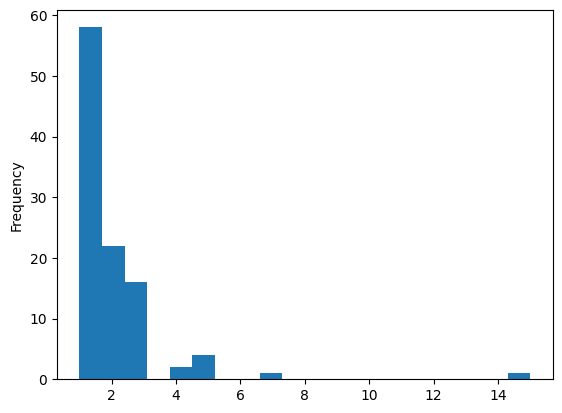

In [7]:
# Price Distribution
std = df['Price'].std()
df["Price"].value_counts().sort_index().plot(kind='hist',bins=20)
print(f'Standard Deviation: {round(df["Price"].std(),3)}')

From the information above, we can see that:
1. For three continous data, Price, Land Area and Building Area, we could check their normality by the rasio of mean and median and coefficient of variation (standard deviation and mean ratio). From these rasio, we could suppose these data are not normally distributed.
2. For strengten our presumption at point above, we can see the skewness and kurtosis number are beyond threshold of normal distribution.
3. For other columns, Bedroom, Bathroom and Carport, they are discrete data so that we cannot see their distribution by these metrics.

### 1. What is the range of fair price for houses in Bekasi?

In [8]:
# Confidence Interval of Price House
N = len(df)
low, up = stats.norm.interval(0.95,loc=df['Price'].mean(),scale=std/np.sqrt(N))
print('Lower Limit:',low)
print('Upper Limit:',up)

Lower Limit: 1202.6976133183712
Upper Limit: 1491.472386681629


From the confidence interval using 95% of confidence level, we can know the fair price for a house in Bekasi ranging from 1,2-1,49 billion rupiah.

### 2. Is the availability of carport make big differences on house price?

Hypotesis Statement:
- H0 = Tidak ada perbedaan signifikan harga rumah dengan carport dan tidak ada carport
- H1 = Ada perbedaan signifikan harga rumah dengan carport dan tidak ada carport


In [9]:
# Calculationg Average Price of Carport Availability
with_carport = df[df["Carport"].isin([1, 2, 3])]["Price"]
without_carport= df[df["Carport"].isin([0])]["Price"]
print(f'Average Price of Houses with Carport : {with_carport.mean()}')
print(f'Average Price of Houses without Carport : {without_carport.mean()}')

Average Price of Houses with Carport : 1746.1904761904761
Average Price of Houses without Carport : 905.9684210526316


Before implementing hypothesis test, we should have the average price of both group houses. As we can see, the average price of houses with carport is 1,74 billion rupiah and without carport is 905 million rupiah.

In [10]:
# Hypothesis Test
t_stat, p_val = stats.ttest_ind(with_carport,without_carport)
print('P-value:',p_val)

P-value: 3.058551778553343e-09


Based on the P-value (0,00000000305), we accept H1 which is there is significant difference house with and without carport.

### 3. Between land area and building area, what is the most affecting factor of houses' price?

In [11]:
# Correlation Analysis
corr_rho_a, pval_s_a = stats.spearmanr(df["Price"], df["Land Area"])
corr_rho_b, pval_s_b = stats.spearmanr(df["Price"], df["Building Area"])

print(f"Correlation between Price and Land Area: {corr_rho_a:.2f}")
print(f"Correlation between Price and Building Area: {corr_rho_b:.2f}")

Correlation between Price and Land Area: 0.65
Correlation between Price and Building Area: 0.71


The correlation calculations use spearman method since the data are not normally distributed. Based on the correlation number, we can see Building Area are more correlated with price than Land Area.

### 4. What districts are top 5 districts of cheapest houses in Bekasi?

In [23]:
df.groupby('Location')['Price'].agg(['mean']).rename(columns={'mean': 'Average Price'}).sort_values(by='Average Price', ascending=False).tail(5)

,Average Price
Location,
Bekasi Barat,556.0
Pondokmelati,550.0
Babelan,522.0
Setu,334.0
Cabang Bungin,198.0


### 5. What is the average price of house having 2 bedrooms?

In [32]:
df.groupby('Bedroom')['Price'].agg(['mean']).loc[2]

mean    788.828125
Name: 2, dtype: float64

### 6. What is the average price of house with land area less than 70 m²?

In [37]:
df[df['Land Area'] < 70]['Price'].agg(['mean'])

mean    773.088235
Name: Price, dtype: float64

## Conclusion
From exploration and analysis, we can gain insight that:
1. Fair price for a house in Bekasi, West Java ranges from 1.2-1.49 billion rupiah.
2. Carport availability affect significant difference on house price so that recommended for buyers without car, can choose cheaper house without carport., if considering a cheaper house.
3. Between land area and building area, building area has stronger correlation for the price so that if buyers want cheaper house, they could consider building area then land area.
4. Top 5 district of the cheapest house are Bekasi Barat (556 million rupiah), Pondokmelati	(550 million rupiah), Babelan (522 million rupiah), Setu (334 million rupiah), Cabang Bungin (198 million rupiah).
5. The average price of house with 2 bedrooms is 788 million rupiah.
6. The average price of house with land area less than 70 m² is 774 million rupiah.